In [1]:
# import Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew,kurtosis
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
import pickle

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
# Shape of Train Dataset
train.shape

(165034, 14)

In [6]:
# # Shape of Test Dataset
test.shape

(110023, 13)

# Combine Datasets:

In [7]:
combined = pd.concat([train,test],ignore_index=True)
combined.head(4)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0


In [8]:
# Shape of Combined Dataset :
combined.shape

(275057, 14)

In [9]:
# See Datatypes of Features Using Info Function:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275057 entries, 0 to 275056
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               275057 non-null  int64  
 1   CustomerId       275057 non-null  int64  
 2   Surname          275057 non-null  object 
 3   CreditScore      275057 non-null  int64  
 4   Geography        275057 non-null  object 
 5   Gender           275057 non-null  object 
 6   Age              275057 non-null  float64
 7   Tenure           275057 non-null  int64  
 8   Balance          275057 non-null  float64
 9   NumOfProducts    275057 non-null  int64  
 10  HasCrCard        275057 non-null  float64
 11  IsActiveMember   275057 non-null  float64
 12  EstimatedSalary  275057 non-null  float64
 13  Exited           165034 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 29.4+ MB


In [10]:
# (.describe) is used to see description of data
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
id,275057.0,1.375280e+05,79402.260834,0.00,68764.0,137528.00,206292.00,275056.00
CustomerId,275057.0,1.569204e+07,71512.708935,15565701.00,15632999.0,15690169.00,15756875.00,15815690.00
CreditScore,275057.0,6.564849e+02,80.188100,350.00,597.0,659.00,710.00,850.00
Age,275057.0,3.812441e+01,8.864927,18.00,32.0,37.00,42.00,92.00
Tenure,275057.0,5.010867e+00,2.806173,0.00,3.0,5.00,7.00,10.00
Balance,275057.0,5.542030e+04,62805.933171,0.00,0.0,0.00,120037.96,250898.09
NumOfProducts,275057.0,1.554002e+00,0.546178,1.00,1.0,2.00,2.00,4.00
HasCrCard,275057.0,7.535893e-01,0.430921,0.00,1.0,1.00,1.00,1.00
IsActiveMember,275057.0,4.967552e-01,0.499990,0.00,0.0,0.00,1.00,1.00
EstimatedSalary,275057.0,1.124710e+05,50286.608747,11.58,74580.8,117848.09,154871.13,199992.48


In [11]:
#Checking the bal of target variable
train.Exited.value_counts(normalize=True)

0    0.788401
1    0.211599
Name: Exited, dtype: float64

In [12]:
# We will analyse the Numerical Column using select dtypes:
num_cols = combined.select_dtypes(include=np.number).columns
num_cols

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
# We will analyse the Categorical Column using select dtypes:
cat_cols = combined.select_dtypes(include="object").columns
cat_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

# Visualization :

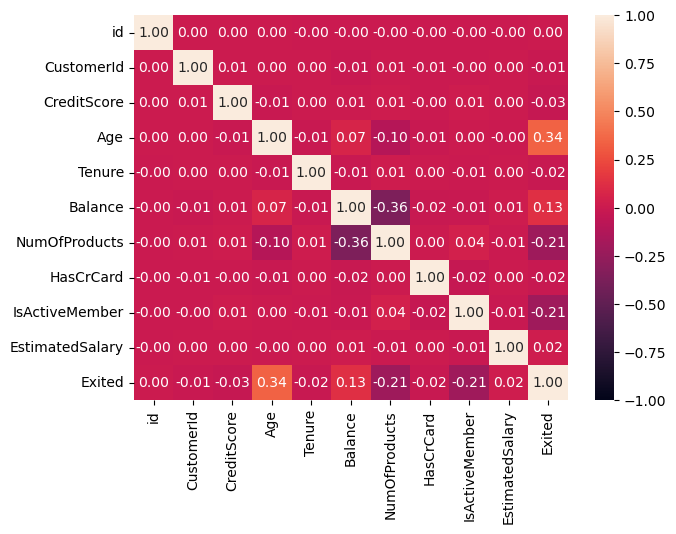

In [14]:
corr = combined.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt='.2f',vmin=-1,vmax=1);

In [15]:
# Check The Missing Values :
combined.isnull().sum()

id                      0
CustomerId              0
Surname                 0
CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited             110023
dtype: int64

# Lets Remove the Insignificant Columns From Data:

In [16]:
combined.drop(columns=["id","CustomerId","Surname"],inplace=True)

In [17]:
combined.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Lest Encode Categorical Columns :

In [18]:
combined["Geography"].value_counts()

France     157386
Spain       60126
Germany     57545
Name: Geography, dtype: int64

In [19]:
combined["Gender"].value_counts()

Male      155092
Female    119965
Name: Gender, dtype: int64

In [20]:
data = pd.get_dummies(combined,drop_first=True,dtype=int)
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.0,2,1.0,0.0,181449.97,0.0,0,0,1
1,627,33.0,1,0.0,2,1.0,1.0,49503.50,0.0,0,0,1
2,678,40.0,10,0.0,2,1.0,0.0,184866.69,0.0,0,0,1


In [21]:
# Check the Datatype Of Variables :
data.dtypes

CreditScore            int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Exited               float64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object

### Split the Data

In [22]:
train_data = data[data["Exited"].notnull()]
pred_data = data[data["Exited"].isnull()]

In [23]:
train_data.shape

(165034, 12)

In [24]:
pred_data.shape

(110023, 12)

In [25]:
x = train_data.drop(columns=["Exited"])
y = train_data["Exited"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y,random_state=2)

In [26]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(132027, 11) (132027,) (33007, 11) (33007,)


### Modelling : 

In [27]:
#Using logistic regression supervised ML classification model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
ypred=lr.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(roc_auc_score(y_test,ypred))

0.787832883933711
[[25103   920]
 [ 6083   901]]
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.88     26023
         1.0       0.49      0.13      0.20      6984

    accuracy                           0.79     33007
   macro avg       0.65      0.55      0.54     33007
weighted avg       0.74      0.79      0.74     33007

0.5468279112639761


In [29]:
def Model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    ypred = m.predict(testx)
    print("Confusion Matrix",confusion_matrix(testy,ypred))
    print("Classification Report",classification_report(testy,ypred))
    prob = m.predict_proba(testx)[:,1]
    print("Roc_Auc",roc_auc_score(testy,prob))
    
    ans = input("Do you Want to Save this Model y/n?")
    if ans.lower()=="y":
        with open("final_model.pkl","wb") as file:
            pickle.dump(m,file)
        print("Model has been Saved")
    else:
        print("Not Saved")

In [30]:
Model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

Confusion Matrix [[25103   920]
 [ 6083   901]]
Classification Report               precision    recall  f1-score   support

         0.0       0.80      0.96      0.88     26023
         1.0       0.49      0.13      0.20      6984

    accuracy                           0.79     33007
   macro avg       0.65      0.55      0.54     33007
weighted avg       0.74      0.79      0.74     33007

Roc_Auc 0.712773984433279
Do you Want to Save this Model y/n?n
Not Saved


In [31]:
# Naive Bayes :
from sklearn.naive_bayes import GaussianNB
Model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

Confusion Matrix [[24848  1175]
 [ 5625  1359]]
Classification Report               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88     26023
         1.0       0.54      0.19      0.29      6984

    accuracy                           0.79     33007
   macro avg       0.68      0.57      0.58     33007
weighted avg       0.76      0.79      0.75     33007

Roc_Auc 0.7658872780352599
Do you Want to Save this Model y/n?n
Not Saved


In [32]:
Model_validation(RandomForestClassifier(n_estimators=200,max_depth=5),x_train,y_train,x_test,y_test)

Confusion Matrix [[25262   761]
 [ 4178  2806]]
Classification Report               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     26023
         1.0       0.79      0.40      0.53      6984

    accuracy                           0.85     33007
   macro avg       0.82      0.69      0.72     33007
weighted avg       0.84      0.85      0.83     33007

Roc_Auc 0.8773969593775953
Do you Want to Save this Model y/n?n
Not Saved


In [33]:
Model_validation(AdaBoostClassifier(n_estimators=200),x_train,y_train,x_test,y_test)

Confusion Matrix [[24704  1319]
 [ 3307  3677]]
Classification Report               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     26023
         1.0       0.74      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

Roc_Auc 0.8782845811919221
Do you Want to Save this Model y/n?n
Not Saved


In [34]:
Model_validation(DecisionTreeClassifier(max_depth=7),x_train,y_train,x_test,y_test)

Confusion Matrix [[24594  1429]
 [ 3173  3811]]
Classification Report               precision    recall  f1-score   support

         0.0       0.89      0.95      0.91     26023
         1.0       0.73      0.55      0.62      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.85      0.86      0.85     33007

Roc_Auc 0.8802894492091519
Do you Want to Save this Model y/n?n
Not Saved


In [41]:
Model_validation(XGBClassifier(),x_train,y_train,x_test,y_test)

Confusion Matrix [[24568  1455]
 [ 3144  3840]]
Classification Report               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     26023
         1.0       0.73      0.55      0.63      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.85      0.86      0.85     33007

Roc_Auc 0.8840645235673315
Do you Want to Save this Model y/n?n
Not Saved


In [45]:
import catboost

In [46]:
from catboost import CatBoostClassifier

In [54]:
Model_validation(CatBoostClassifier(iterations=100,learning_rate=0.1,depth=6,l2_leaf_reg=3),x_train,y_train,x_test,y_test)

0:	learn: 0.6382778	total: 14ms	remaining: 1.39s
1:	learn: 0.5930268	total: 26.9ms	remaining: 1.32s
2:	learn: 0.5558172	total: 36.8ms	remaining: 1.19s
3:	learn: 0.5245274	total: 46.3ms	remaining: 1.11s
4:	learn: 0.4975617	total: 55.5ms	remaining: 1.05s
5:	learn: 0.4749494	total: 64.9ms	remaining: 1.02s
6:	learn: 0.4551696	total: 74.4ms	remaining: 988ms
7:	learn: 0.4388247	total: 84.1ms	remaining: 967ms
8:	learn: 0.4242207	total: 96.4ms	remaining: 975ms
9:	learn: 0.4113787	total: 108ms	remaining: 974ms
10:	learn: 0.4004191	total: 119ms	remaining: 964ms
11:	learn: 0.3909844	total: 130ms	remaining: 956ms
12:	learn: 0.3826588	total: 140ms	remaining: 939ms
13:	learn: 0.3755273	total: 151ms	remaining: 927ms
14:	learn: 0.3692880	total: 160ms	remaining: 908ms
15:	learn: 0.3643315	total: 169ms	remaining: 888ms
16:	learn: 0.3593801	total: 178ms	remaining: 869ms
17:	learn: 0.3550134	total: 187ms	remaining: 854ms
18:	learn: 0.3510468	total: 196ms	remaining: 836ms
19:	learn: 0.3476164	total: 205ms	

# Prediction

In [55]:
with open("final_model.pkl","rb") as file:
    final_model = pickle.load(file)

In [56]:
submission = pd.read_csv("sample_submission.csv")

In [57]:
submission["Exited"] = final_model.predict_proba(pred_data.drop(columns=["Exited"]))[:,1]

In [58]:
submission

,id,Exited
0,165034,0.022612
1,165035,0.853862
2,165036,0.029595
3,165037,0.232526
4,165038,0.355035
...,...,...
110018,275052,0.047197
110019,275053,0.097878
110020,275054,0.018259
110021,275055,0.146876


In [59]:
submission.to_csv("final_submission.csv",index=False)